In [2]:
# Setting the variables of the model
def init_variables(model_name=None, t_rate=None, r_rate=None, p_pop=None, a_rate=None): 
    if model_name == 'Regina George':
        t_rate = 0.03
        r_rate = 0.1
        p_pop = 0.2
        a_rate = 0.
    elif model_name == 'Dr. Neverheardofher':
        t_rate = 0.0001
        r_rate = 0.00001
        p_pop = 0.99
        a_rate = 0.
    elif model_name == 'the Conwoman':
        t_rate = 0.003
        r_rate = 0.001
        p_pop = 0.7
        a_rate = 0.009
    elif model_name == 'Test':
        t_rate = 0.002
        r_rate = 0.01
        p_pop = 0.6
        a_rate = 0
    else:
        t_rate = t_rate
        r_rate = r_rate
        p_pop = p_pop
        a_rate = a_rate
    return t_rate, r_rate, p_pop, a_rate
  

In [3]:
def gossip_model(time, population, t_rate, r_rate, p_pop, a_rate): 
  t_rate, r_rate, p_pop, a_rate = t_rate, r_rate, p_pop, a_rate
  susceptible = population[0]
  infected = population[1]
  recovered = population[2]
  s_ODE = -t_rate * susceptible * infected 
  i_ODE = p_pop * t_rate * susceptible * infected - r_rate * infected + a_rate * recovered 
  r_ODE = r_rate * infected - a_rate * recovered + (1 - p_pop) * t_rate * susceptible * infected
  return [s_ODE, i_ODE, r_ODE]

In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy import integrate as inte
import matplotlib.pyplot as plt

def plot_model(model, title): 
  labels = ['S', 'I', 'R']
  for i in range(model.y.shape[0]):
      plt.plot(model.t, model.y[i], label=labels[i], linewidth=2.5)
  plt.xlabel('Days') 
  plt.ylabel('Population')
  plt.title(title)
  plt.legend() 
  plt.show()

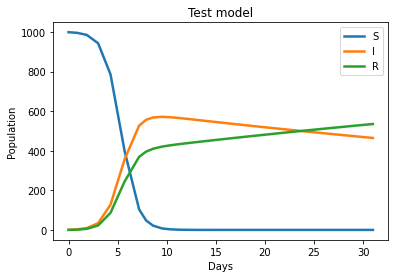

In [5]:
# Test model
population = np.array([999, 1, 0])
time = (0, 31)
variables = init_variables('Test')
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Test model')

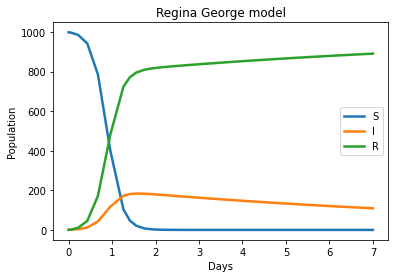

In [6]:
# Regina George model 
population = np.array([999, 1, 0])
time = (0, 7)
variables = init_variables('Regina George')
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Regina George model')

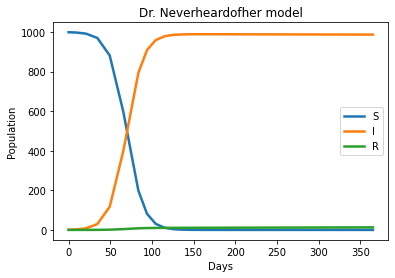

In [7]:
# Dr. Neverheardofher model
population = np.array([999, 1, 0])
time = (0, 365)
variables = init_variables('Dr. Neverheardofher')
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Dr. Neverheardofher model')

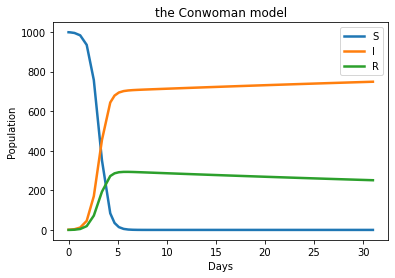

In [8]:
# the Conwoman model 
population = np.array([999, 1, 0])
time = (0, 31)
variables = init_variables('the Conwoman')
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'the Conwoman model')

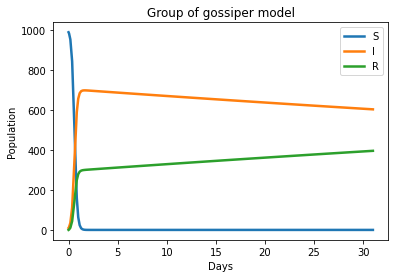

In [26]:
# Group of gossiper model 
population = np.array([990, 10, 0])
time = (0, 31)
variables = init_variables(t_rate=0.01, r_rate=0.005, p_pop=0.7, a_rate=0)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Group of gossiper model')

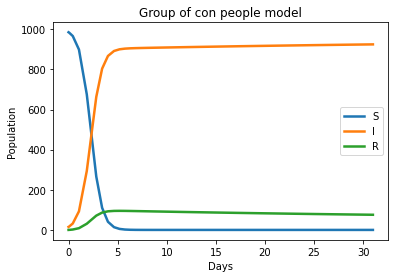

In [10]:
# Group of con people model 
population = np.array([985, 15, 0])
time = (0, 31)
variables = init_variables(t_rate=0.002, r_rate=0.001, p_pop=0.9, a_rate=0.02)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Group of con people model')

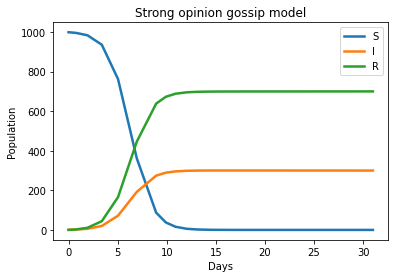

In [11]:
# Strong opinion gossip model
population = np.array([999, 1, 0])
time = (0, 31) 
variables = init_variables(t_rate=0.003, r_rate=0.0001, p_pop=0.3, a_rate=0)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Strong opinion gossip model')

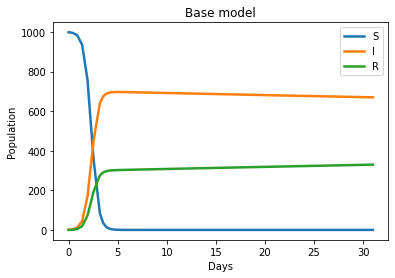

In [32]:
# Base model for strategy comparisons 
population = np.array([999, 1, 0])
time = (0, 31) 
variables = init_variables(t_rate=0.004, r_rate=0.002, p_pop=0.7, a_rate=0.001)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Base model')

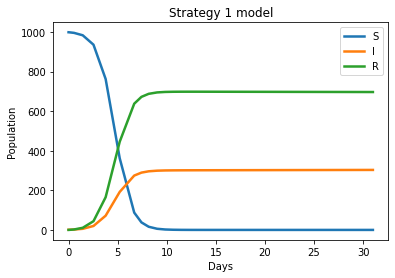

In [33]:
# Strategy 1: decrease p_pop 
population = np.array([999, 1, 0])
time = (0, 31) 
variables = init_variables(t_rate=0.004, r_rate=0.002, p_pop=0.3, a_rate=0.001)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Strategy 1 model')

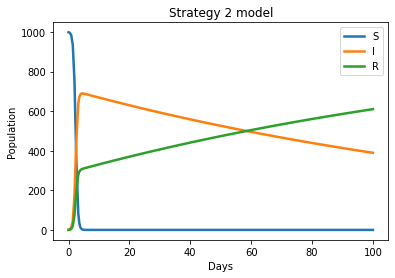

In [38]:
# Strategy 2: increase recovery rate, decrease a_rate 
population = np.array([999, 1, 0])
time = (0, 100) 
variables = init_variables(t_rate=0.004, r_rate=0.006, p_pop=0.7, a_rate=0)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Strategy 2 model')

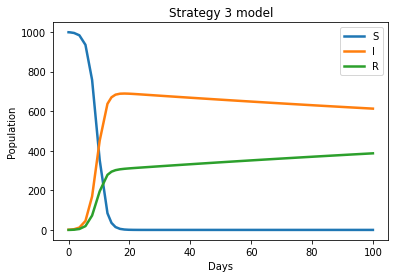

In [42]:
# Strategy 3: decrease t_rate 
population = np.array([999, 1, 0])
time = (0, 100) 
variables = init_variables(t_rate=0.001, r_rate=0.002, p_pop=0.7, a_rate=0.001)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Strategy 3 model')

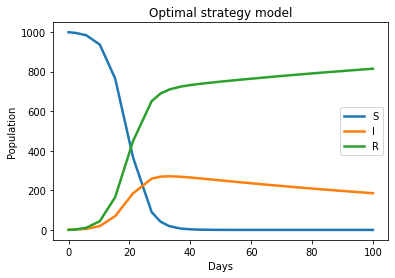

In [45]:
# Optimal strategy: decrease t_rate, increase r_rate, decrease p_pop, and decrease a_rate
population = np.array([999, 1, 0])
time = (0, 100) 
variables = init_variables(t_rate=0.001, r_rate=0.006, p_pop=0.3, a_rate=0)
model = solve_ivp(gossip_model, time, population, args=variables)
plot_model(model, 'Optimal strategy model')